<h1>Class</h1>
<div style="width:70%; margin-top: 1em;">
<p>Motto:</p>
<p><i>Science is built of facts the way a house is built of bricks:
    but an accumulation of facts is no more science than a pile
    of bricks is a house.</i>
<div style="float: right;">Henri Poincaré</div>
</p>
</div>

<h2>Nadhled:</h2>
<ul>
<li>Máme naměřená data,</li>
<li>vztah, který by měly splňovat </li>
<li>metodu, která to provede</li>
<li>a vizualizuje výsledky.</li>
</ul>

<p>
Tyto části jsou samy o sobě bezvýznamné, terpve jejich složením dostáváme něco užitečného.
</p>

<h3>Vlastnosti:</h3>
<ul>
<li>Sdružení různých logických objektů do jednoho objektu.</li>
<li>Oddělení logických částí (potlačení chaosu).</li>
<li>Snadnější zvládání velkých celků.</li>
<li> „... zaútočíme operátorem tečka ...“(Ziki)</li>
</ul>

<h2>Class, objekt</h2>

<pre>
class jmeno:
      
     def __init__(self,..):
        self... = ...
      
     def funkce(self):
     
        self.promenna = ...
        
#end class        
</pre>


In [70]:
import operator
import math

class Vector:

    vata = "vatelin"
    def __init__(self,x,y):
        self.x = x
        self.y = y
        #self.vata = "vata" # vysvetlit self.
    def __str__(self):
        #return "Vector: " + str(self.x) + " " + str(self.y)
        return f"Vector: {self.x} {self.y}"  # print
    def __add__(a,b):                        # scitani
        return Vector(a.x+b.x, a.y+b.y)
    def __private(self):                     # private
        return "private"
    def norm(self):                          # norma
        # Euclidean norm        
        return math.sqrt(self.x**2 + self.y**2)        
    

In [69]:
a = Vector(1,2)
print(a.x, a.y, a.vata)

1 2 vatelin


In [71]:
print(a)
print(a.norm())

Vector: 1 2
2.23606797749979


In [4]:
b = Vector(3,4)

In [5]:
print(a + b)

Vector: 4 6


In [6]:
c = a + b

In [7]:
print(c)

Vector: 4 6


In [8]:
print(c.vata)

vatelin


In [9]:
print(a.__private())

AttributeError: 'Vector' object has no attribute '__private'

<h2>Inheritance</h2>
<p>neboli dědení</p>

In [72]:
class Vector3D(Vector):
    def __init__(self,x,y,z):
        Vector.__init__(self,x,y)
        self.z = z
    def norm(self):
        # zajimave zkusit jen pro Vector.norm
        return math.sqrt(self.x**2 + self.y**2 + self.z**2)

In [75]:
v3 = Vector3D(1,2,3)
print(v3.x, v3.y, v3.z)

1 2 3


In [74]:
print(v3.norm())

3.7416573867739413


In [14]:
v3.vata

'vatelin'

In [15]:
# intermezzo, GUI

<h1>Fišerův problém optikou tříd</h1>



In [1]:
import pandas
import scipy.optimize
class Fisher:
    def __init__(self,filename):
        
        self.popt = []
        self.pcov = []
        
        # ziskani dat
        data = pandas.read_csv(filename)
        
        # vztah C = A * B
        self.T = data['T']
        self.C = data['A'] * data['B']
    
    def f(self,x,a,b):
          return a * x + b
    
    def fit(self):
        self.popt, self.pcov = scipy.optimize.curve_fit(self.f, self.T, self.C)
        print(f"Best fit line parameters: a={self.popt[0]:.3f}, b={self.popt[1]:.3f}")

In [2]:
# Řešení Fišerova problému
problem = Fisher('data.csv')
problem.fit()

Best fit line parameters: a=0.628, b=70.218


In [3]:
class FisherModified(Fisher):
    def f(self,x,a,b):
        return a * x + b - 30

In [5]:
problem_mod = FisherModified('data.csv')
problem_mod.fit()

Best fit line parameters: a=0.628, b=100.218


In [6]:
class FisherKvadratic(Fisher):
    def f(self,x,a,b,c):
        return a * x**2 + b * x + c
    def fit(self):
        self.popt, self.pcov = scipy.optimize.curve_fit(self.f, self.T, self.C)
        print(f"Best fit line parameters: a={self.popt[0]:.3f}, b={self.popt[1]:.3f} c={self.popt[2]:.3f}")

In [7]:
problem_kva = FisherKvadratic('data.csv')
problem_kva.fit()

Best fit line parameters: a=-0.029, b=1.679 c=60.873


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

class FisherGraph(Fisher):
    def __init__(self,filename):
        
        # initializace Fishera
        Fisher.__init__(self,filename)
        self.xlabel = "$T$"
        self.ylabel = "$C(T)$"
        self.title = "Fisher's problem solved !"

    def graph(self):        
        
        #if len(self.popt) == 0:
        #    print("Variable popt is undefined. Run .fit() first of all.")
        #    return
        self.fit()
        
        y = self.f(self.T, self.popt[0], self.popt[1])
        plt.plot(self.T, self.C, 'o', label='data')
        plt.plot(self.T, y, label=r'$y = a \, x + b$')
        plt.legend(loc='best')        
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        plt.title(self.title)        

Best fit line parameters: a=0.628, b=70.218


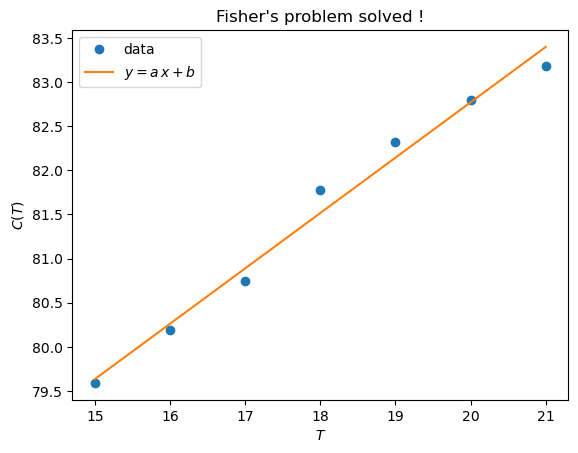

In [15]:
problem_graph = FisherGraph('data.csv')
#problem_graph.fit()
#problem_graph.xlabel = "teplota"
problem_graph.graph()

In [17]:
class FisherGraphKvadratic(FisherKvadratic):
    def __init__(self,filename):
        
        # initializace Fishera
        FisherKvadratic.__init__(self,filename)
        self.xlabel = "$T$"
        self.ylabel = "$C(T)$"
        self.title = "Fisher's problem solved !"

    def graph(self):        
        
        y = self.f(self.T, self.popt[0], self.popt[1], self.popt[2])        
        plt.plot(self.T, self.C, 'o', label='data')
        plt.plot(self.T, y, label=r'$y = a \, x^2 + b \, x + c$')
        plt.legend(loc='best')        
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        plt.title(self.title)
        

Best fit line parameters: a=-0.029, b=1.679 c=60.873


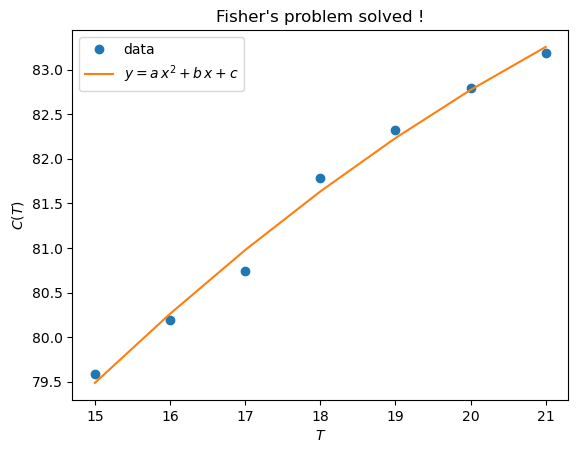

In [18]:
problem_graph_kva = FisherGraphKvadratic('data.csv')
problem_graph_kva.fit()
problem_graph_kva.graph()